## Importing Libraries

In [1]:
import numpy as np   #numerical python for mathametical opperatioins 
import pandas as pd  #data manupulation usind pandas
import matplotlib.pyplot as plt  #visualization using plots 
import seaborn as sns            #visualization using plots 
from warnings import filterwarnings  
filterwarnings("ignore")         #to ignore warnings
#statistical test
from sklearn.model_selection import train_test_split #to split data into train and test data 
from sklearn.linear_model import LinearRegression    #for predection
from sklearn.linear_model import Lasso               #regularization methods
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score #Evaluation matrix
from sklearn.preprocessing import StandardScaler #used to scale the features
from sklearn.preprocessing import LabelEncoder   #for encoding
from sklearn.model_selection import RandomizedSearchCV  #to find the best hyperparameters
from sklearn.ensemble import ExtraTreesRegressor        #used for feature selection

## Importing Dataset

In [2]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\laptopPrice.csv")

In [3]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


1. brand-Company
2. processor_brand-Processor's brand
3. processor_name-Name of the Processor
4. processor_gnrtn-Processor Generation
5. ram_gb-Ram size
6. ram_type-Ram Type
7. ssd-SSD Size
8. hdd-HDD Size
9. os-OS type
10. os_bit-OS bits
11. graphic_card_gb-graphic card size
12. weight-Weight of the laptop
13. warranty-warranty of the laptop
14. Touchscreen-weather the laptop is touch or not
15. msoffice-wheather the laptop has msoffice
16. Price-price of the laptop
17. rating-rating of the laptop
18. Number of Ratings-number of ratings for the laptop
19. Number of Reviews-number of reviews for the laptop

## Exploring dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [6]:
data.shape

(823, 19)

## Exploratory data analysis

In [7]:
data.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [8]:
data[data.duplicated()]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
13,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
45,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,45990,4 stars,816,147
125,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,40990,4 stars,4008,519
182,DELL,Intel,Core i3,11th,4 GB,DDR4,256 GB,1024 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,Yes,43590,3 stars,0,0
265,ASUS,Intel,Core i5,11th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,59990,3 stars,0,0
352,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,84990,3 stars,0,0
375,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,99990,3 stars,0,0
391,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
393,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
399,Avita,Intel,Core i5,8th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,73063,3 stars,17,3


In [9]:
data.drop_duplicates(keep='first',inplace=True)

In [10]:
data.shape

(802, 19)

In [11]:
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


Exploring Each Column

In [12]:
data.Price.head()

0    34649
1    38999
2    39999
3    69990
4    26990
Name: Price, dtype: int64

<Axes: >

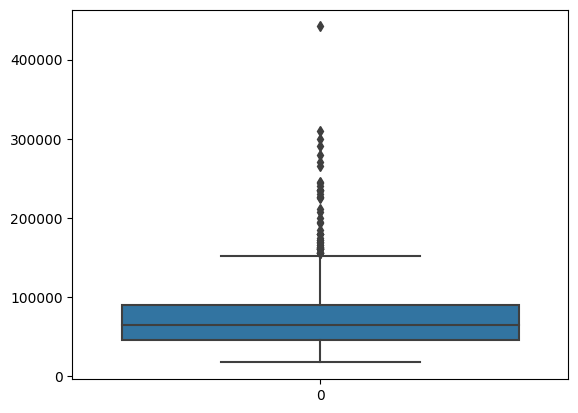

In [13]:
sns.boxplot(data.Price)

In [14]:
data[data.Price>250000].index

Int64Index([433, 547, 590, 591, 593, 594, 621], dtype='int64')

<Axes: >

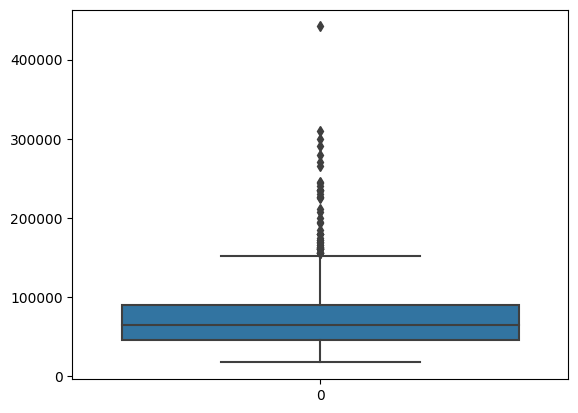

In [15]:
sns.boxplot(data.Price)

In [16]:
data.drop(data[data.Price>250000].index,axis=0,inplace=True)

In [17]:
data[data.Price>250000].index

Int64Index([], dtype='int64')

<Axes: >

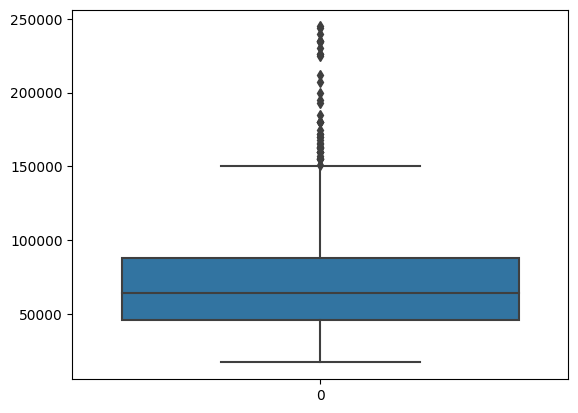

In [18]:
sns.boxplot(data.Price)

<Axes: xlabel='Price', ylabel='Density'>

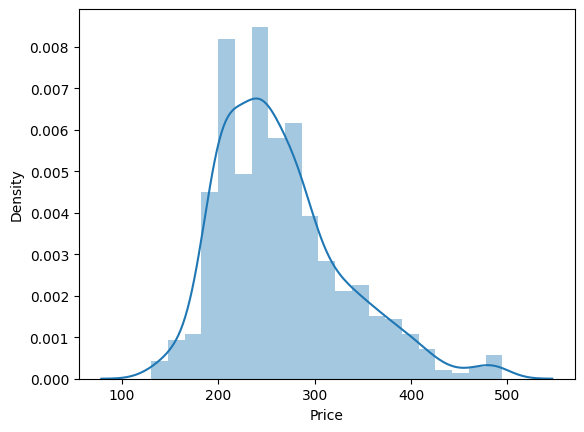

In [19]:
sns.distplot(np.sqrt(data.Price))

<Axes: xlabel='Price', ylabel='Density'>

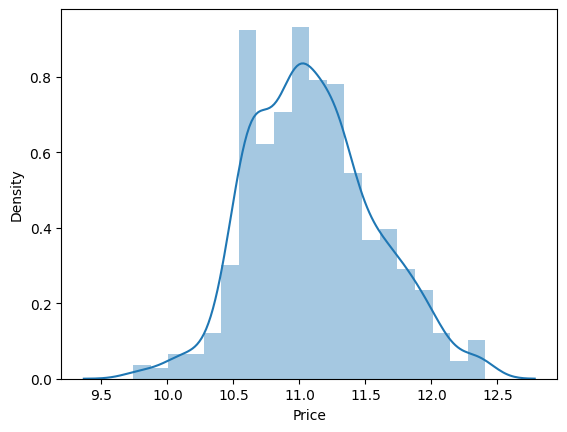

In [20]:
sns.distplot(np.log(data.Price))

In [21]:
data.price=np.log(data.Price)

In [22]:
data.Price.head()

0    34649
1    38999
2    39999
3    69990
4    26990
Name: Price, dtype: int64

In [23]:
data.dtypes[data.dtypes=="object"]

brand              object
processor_brand    object
processor_name     object
processor_gnrtn    object
ram_gb             object
ram_type           object
ssd                object
hdd                object
os                 object
os_bit             object
graphic_card_gb    object
weight             object
warranty           object
Touchscreen        object
msoffice           object
rating             object
dtype: object

In [24]:
data.dtypes[data.dtypes!="object"]

Price                int64
Number of Ratings    int64
Number of Reviews    int64
dtype: object

In [25]:
def num(num_feature):
    print("Data Type\n",data[num_feature].dtype)
    print("Unique Datas\n",data[num_feature].unique())
    print("Describing the data\n",data[num_feature].describe())

    sns.scatterplot(x=num_feature,y="Price",data=data)
    plt.show()
    sns.boxplot(data[num_feature])

    print("correlation\n",np.corrcoef(data[num_feature],data.Price))

In [26]:
def cat(cat_feature):
    print("Data Type\n",data[cat_feature].dtype)
    print("Unique Datas\n",data[cat_feature].unique())
    print("Describing the data\n",data[cat_feature].describe())

    sns.countplot(x=cat_feature,data=data)
    plt.show()
    sns.violinplot(x=cat_feature,data=data,y="Price")

In [105]:
label_encoder=LabelEncoder()

Brand(catagorical Data)

Data Type
 object
Unique Datas
 ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
Describing the data
 count      795
unique       8
top       ASUS
freq       240
Name: brand, dtype: object


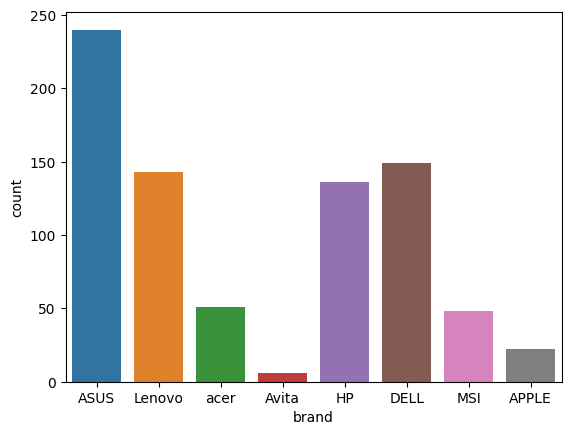

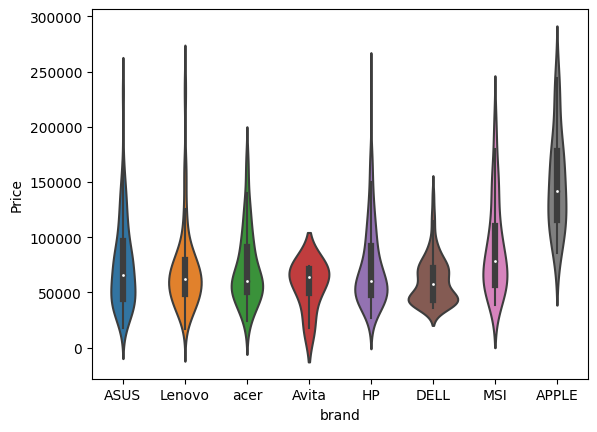

In [27]:
cat("brand")

In [52]:
data["brand"]=label_encoder.fit_transform(data["brand"]).astype("int64")

Data Type
 object
Unique Datas
 ['Intel' 'AMD' 'M1']
Describing the data
 count       795
unique        3
top       Intel
freq        588
Name: processor_brand, dtype: object


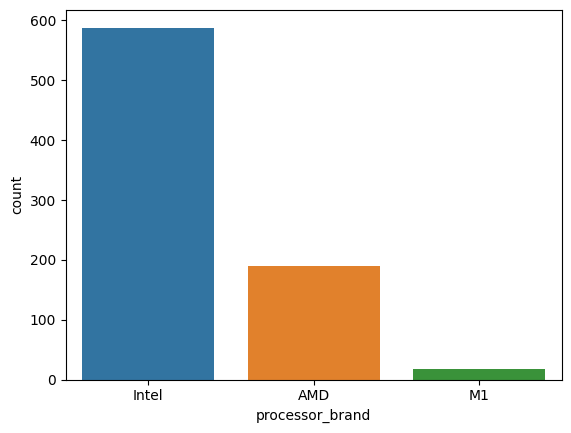

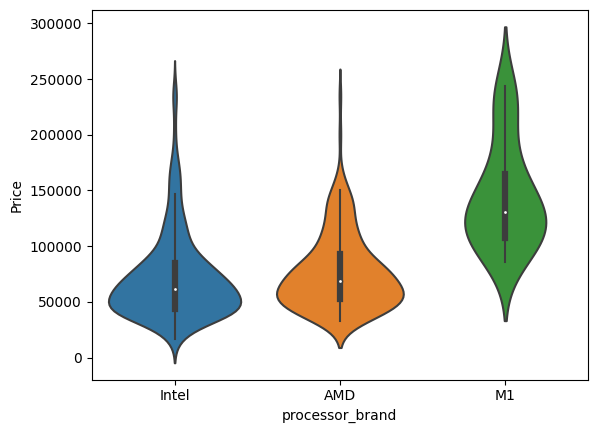

In [28]:
cat("processor_brand")

In [57]:
data["processor_brand"]=label_encoder.fit_transform(data["processor_brand"]).astype("int64")

Data Type
 object
Unique Datas
 ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
Describing the data
 count         795
unique         11
top       Core i5
freq          283
Name: processor_name, dtype: object


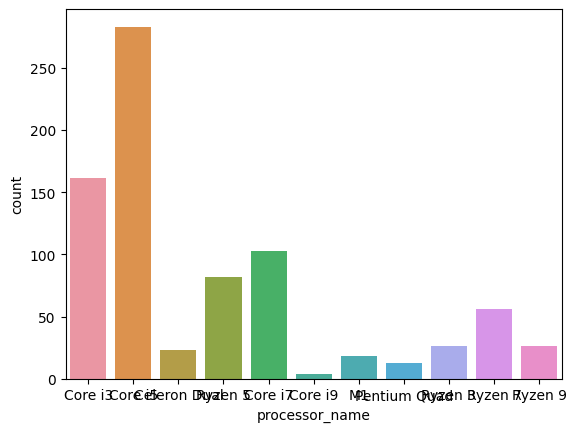

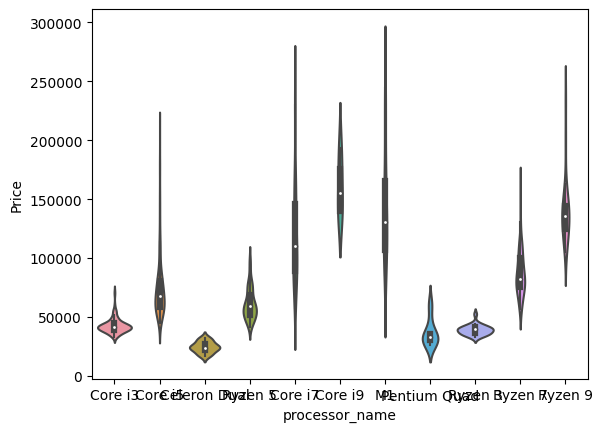

In [29]:
cat("processor_name")

In [58]:
data["processor_name"]=label_encoder.fit_transform(data["processor_name"]).astype("int64")

Data Type
 object
Unique Datas
 ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
Describing the data
 count      795
unique       8
top       11th
freq       327
Name: processor_gnrtn, dtype: object


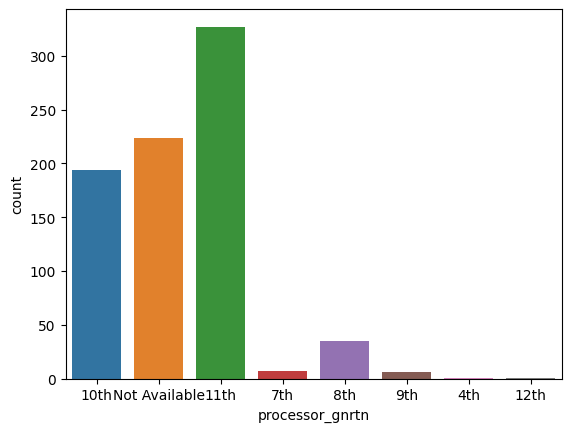

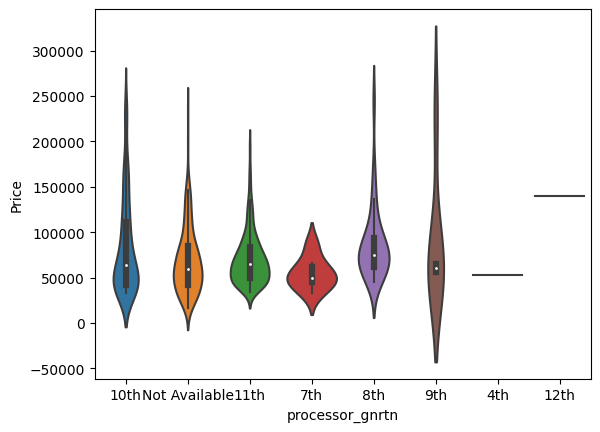

In [30]:
cat("processor_gnrtn")

In [84]:
data["processor_gnrtn"].replace({'10th':10, 'Not Available':0, '11th':11, '7th':7, '8th':8, '9th':9, '4th':4,'12th':12},inplace=True)

Data Type
 object
Unique Datas
 ['4 GB' '8 GB' '16 GB' '32 GB']
Describing the data
 count      795
unique       4
top       8 GB
freq       403
Name: ram_gb, dtype: object


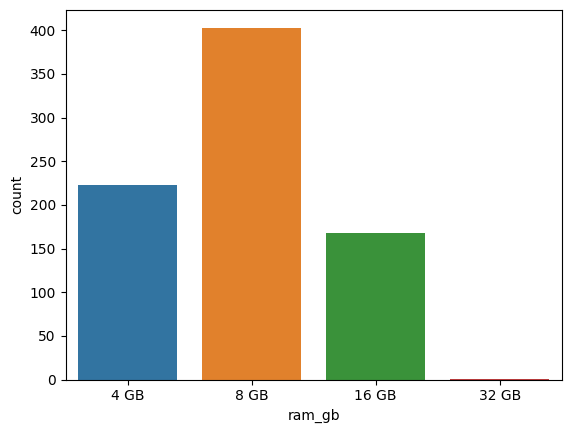

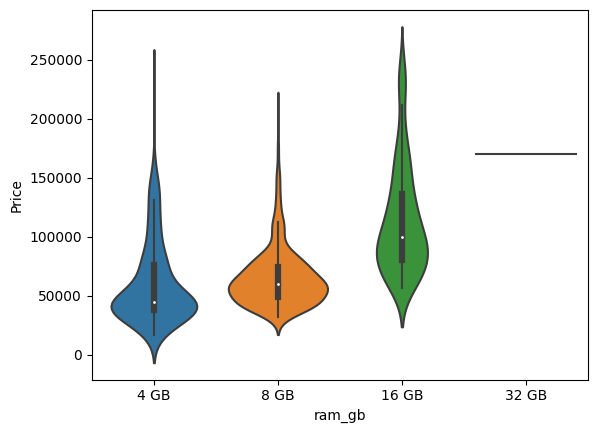

In [31]:
cat("ram_gb")

In [80]:
data["ram_gb"].replace({'4 GB':4, '8 GB':8, '16 GB':16, '32 GB':32},inplace=True)

Data Type
 object
Unique Datas
 ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
Describing the data
 count      795
unique       6
top       DDR4
freq       686
Name: ram_type, dtype: object


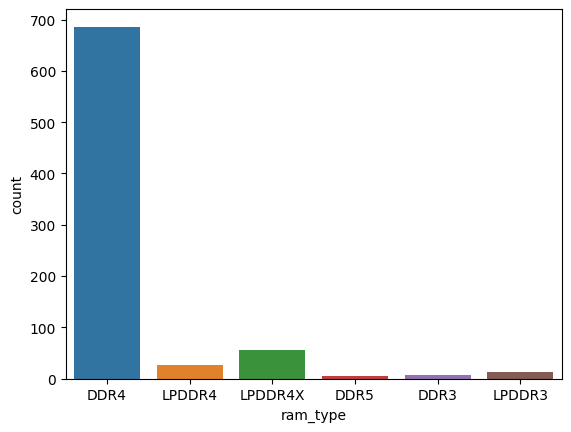

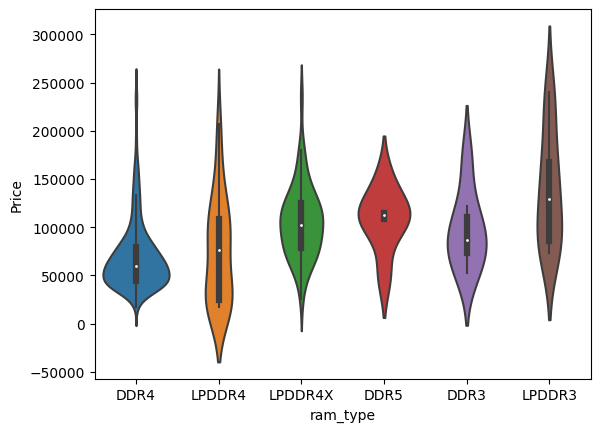

In [32]:
cat("ram_type")

In [87]:
data["ram_type"]=label_encoder.fit_transform(data["ram_type"]).astype("int64")

Data Type
 object
Unique Datas
 ['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB']
Describing the data
 count        795
unique         6
top       512 GB
freq         389
Name: ssd, dtype: object


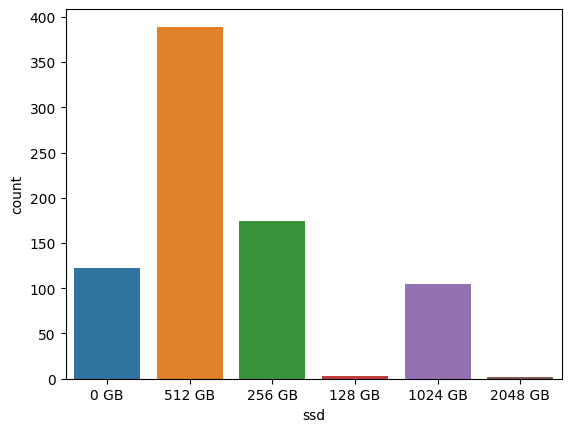

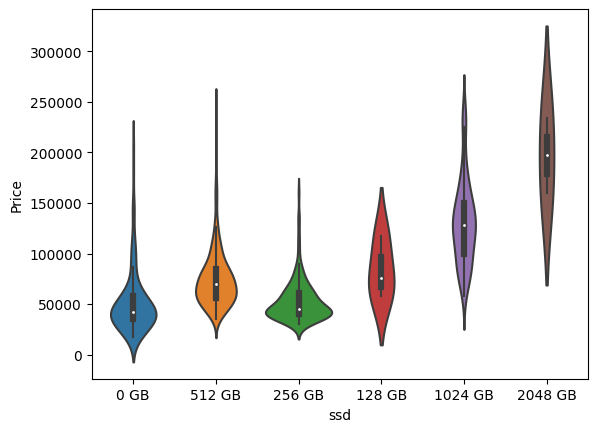

In [33]:
cat("ssd")

In [90]:
data["ssd"].replace({'0 GB':0, '512 GB':512, '256 GB':256, '128 GB':128, '1024 GB':1024, '2048 GB':2048},inplace=True)

Data Type
 object
Unique Datas
 ['1024 GB' '0 GB' '512 GB' '2048 GB']
Describing the data
 count      795
unique       4
top       0 GB
freq       596
Name: hdd, dtype: object


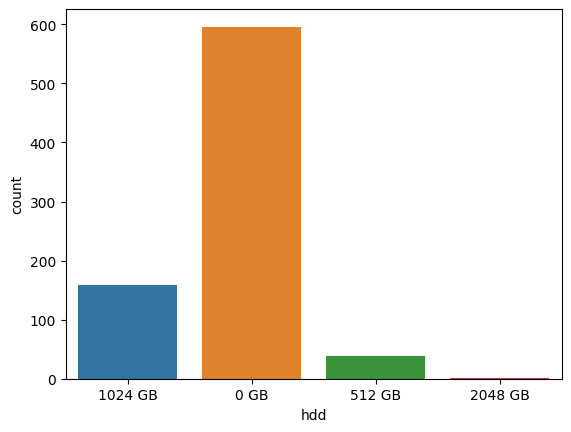

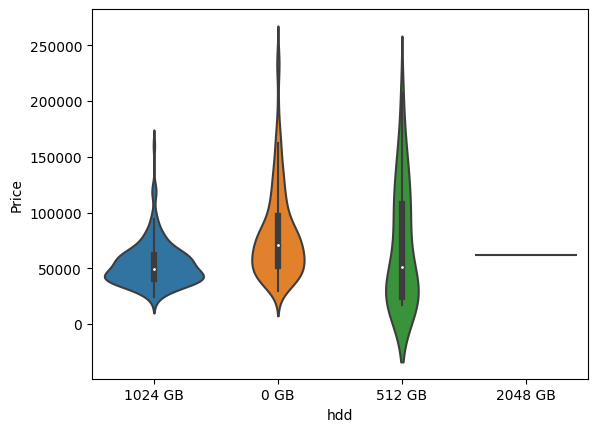

In [34]:
cat("hdd")

In [94]:
data["hdd"].replace({'1024 GB':1024, '0 GB':0, '512 GB':512, '2048 GB':2048},inplace=True)

Data Type
 object
Unique Datas
 ['Windows' 'DOS' 'Mac']
Describing the data
 count         795
unique          3
top       Windows
freq          758
Name: os, dtype: object


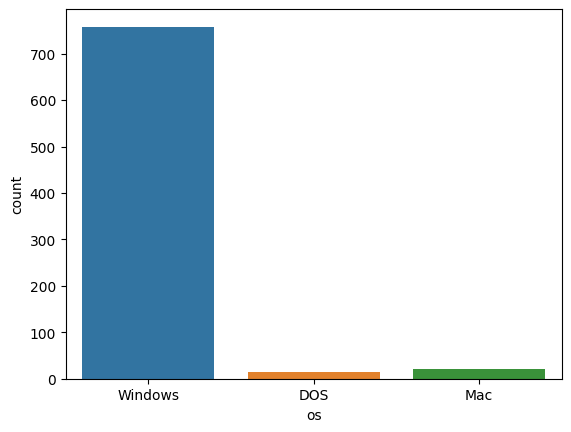

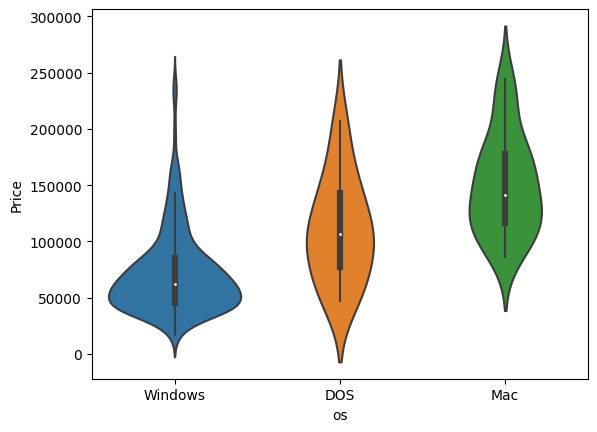

In [35]:
cat("os")

In [95]:
data["os"]=label_encoder.fit_transform(data["os"]).astype("int64")

Data Type
 object
Unique Datas
 ['64-bit' '32-bit']
Describing the data
 count        795
unique         2
top       64-bit
freq         689
Name: os_bit, dtype: object


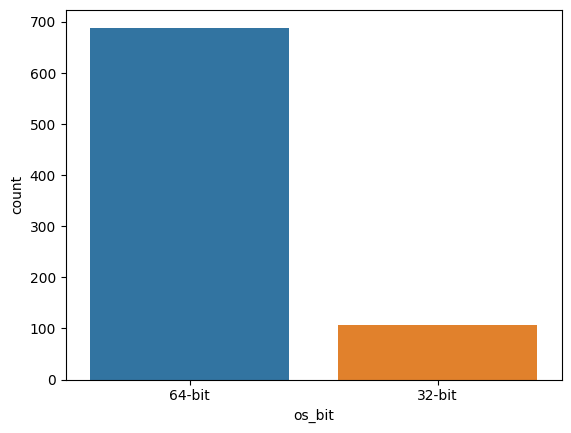

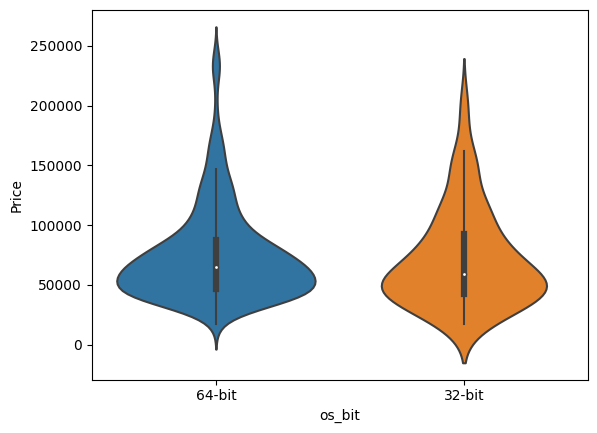

In [36]:
cat("os_bit")

In [98]:
data["os_bit"].replace({'64-bit':64, '32-bit':32},inplace=True)

Data Type
 object
Unique Datas
 ['0 GB' '2 GB' '4 GB' '6 GB' '8 GB']
Describing the data
 count      795
unique       5
top       0 GB
freq       556
Name: graphic_card_gb, dtype: object


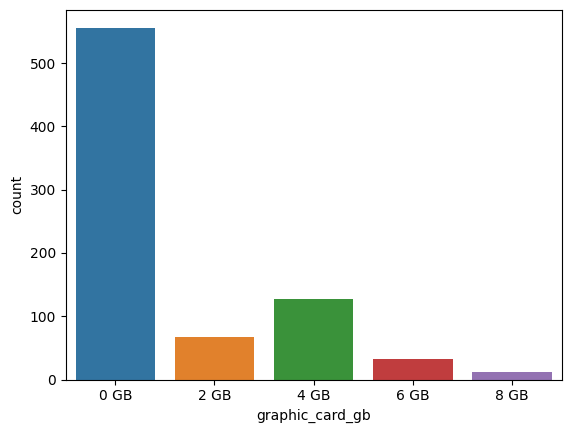

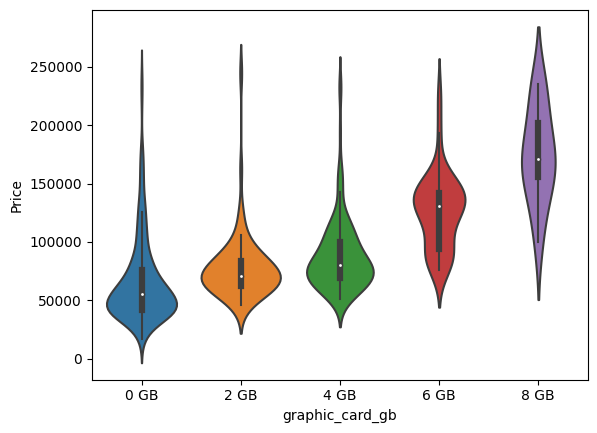

In [37]:
cat("graphic_card_gb")

In [99]:
data["graphic_card_gb"].unique()

array(['0 GB', '2 GB', '4 GB', '6 GB', '8 GB'], dtype=object)

In [101]:
data["graphic_card_gb"].replace({'0 GB':0, '2 GB':2, '4 GB':4, '6 GB':6, '8 GB':8},inplace=True)

Data Type
 object
Unique Datas
 ['Casual' 'ThinNlight' 'Gaming']
Describing the data
 count        795
unique         3
top       Casual
freq         502
Name: weight, dtype: object


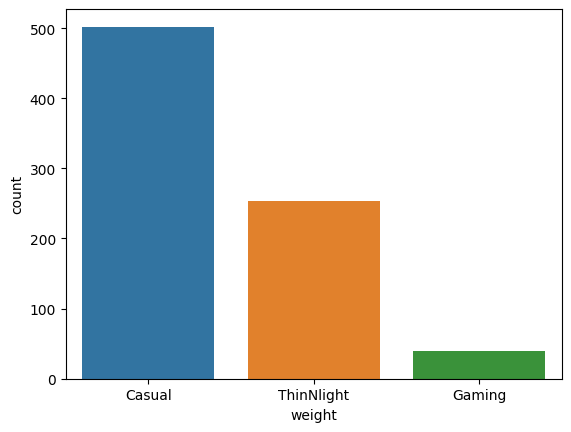

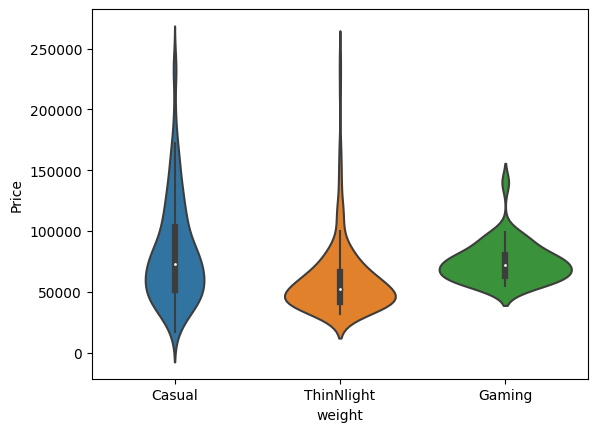

In [38]:
cat("weight")

In [102]:
data["weight"]=label_encoder.fit_transform(data["weight"]).astype("int64")

Data Type
 object
Unique Datas
 ['No warranty' '1 year' '2 years' '3 years']
Describing the data
 count        795
unique         4
top       1 year
freq         495
Name: warranty, dtype: object


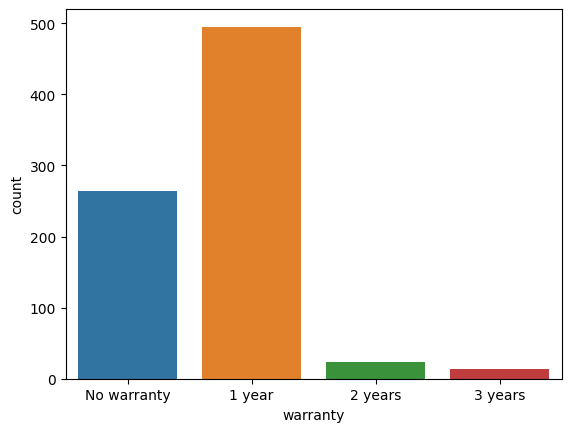

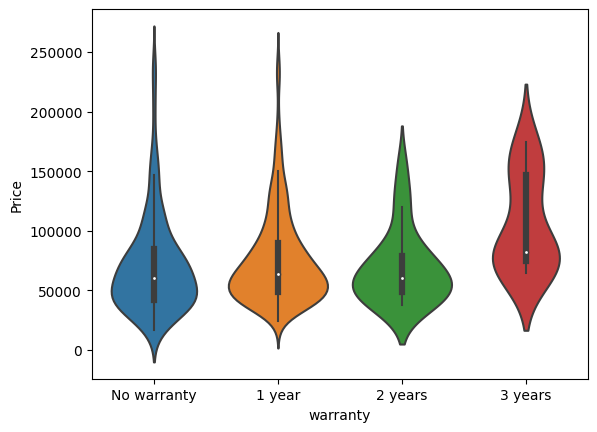

In [39]:
cat("warranty")

In [122]:
data["warranty"].replace({'No warranty':0, '1 year':1, '2 years':2, '3 years':3},inplace=True)

Data Type
 object
Unique Datas
 ['No' 'Yes']
Describing the data
 count     795
unique      2
top        No
freq      700
Name: Touchscreen, dtype: object


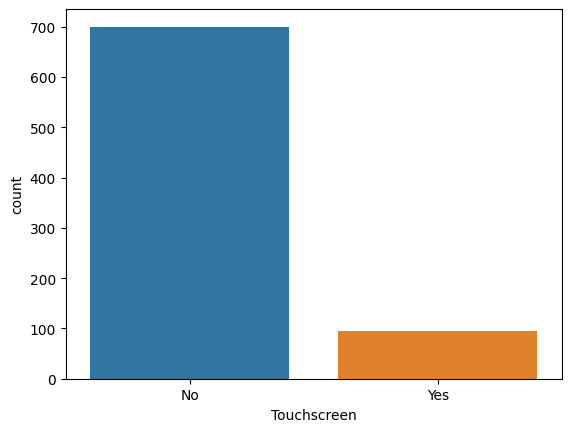

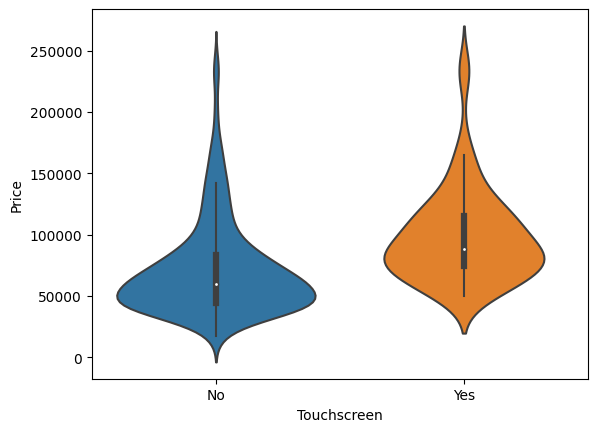

In [40]:
cat("Touchscreen")

In [110]:
data["Touchscreen"].replace({"No":0,"Yes":1},inplace=True)

Data Type
 object
Unique Datas
 ['No' 'Yes']
Describing the data
 count     795
unique      2
top        No
freq      515
Name: msoffice, dtype: object


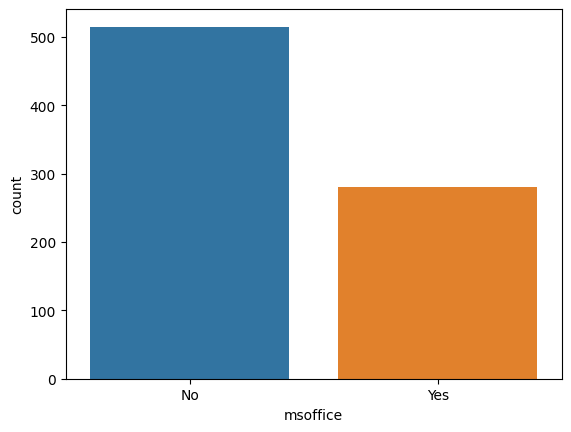

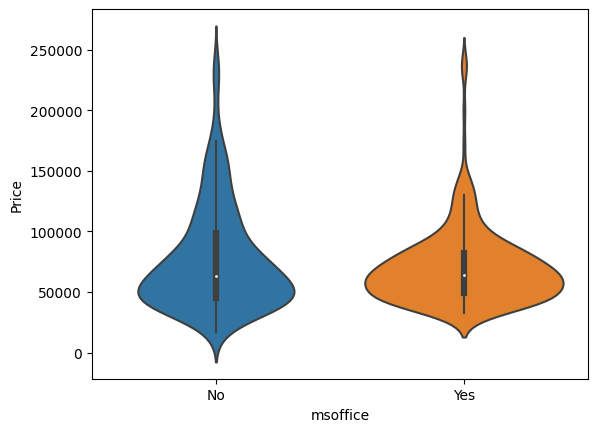

In [41]:
cat("msoffice")

In [111]:
data["msoffice"].replace({"No":0,"Yes":1},inplace=True)

Data Type
 object
Unique Datas
 ['2 stars' '3 stars' '4 stars' '5 stars' '1 star']
Describing the data
 count         795
unique          5
top       4 stars
freq          435
Name: rating, dtype: object


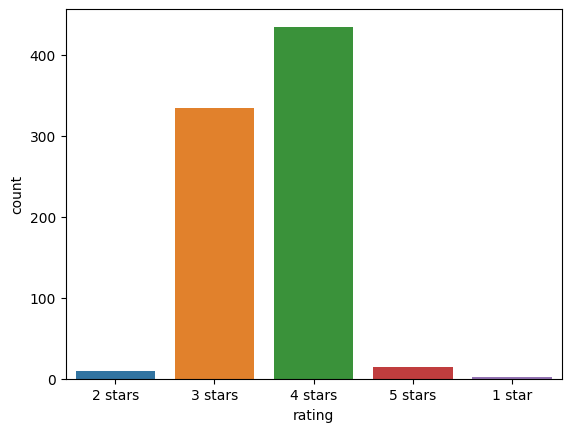

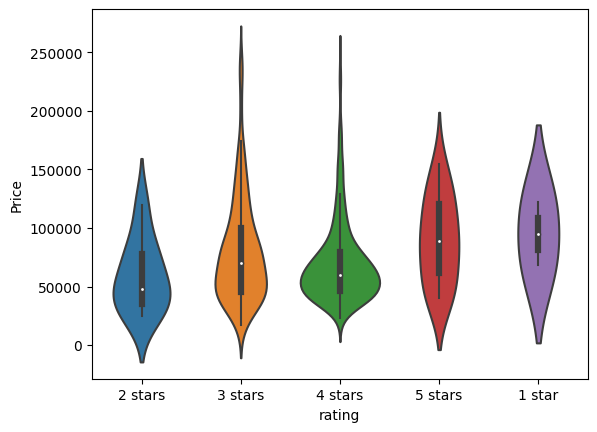

In [42]:
cat("rating")

In [114]:
data["rating"].replace({'2 stars':2, '3 stars':3, '4 stars':4, '5 stars':5, '1 star':1},inplace=True)

Data Type
 int64
Unique Datas
 [    3    65     8     0    31  1946   259   425  1120   286    58     7
 15279   311    47    37  2080  1479    67   273  1267    14   284    44
    33    10   816   543     9  1178   299    20   758   634     4    17
    24  1753   216  1084    19   106    42  1029    53    48    61    97
   181   529  5205  1090     1    70   632    71   990   158   681   130
    30     6   174    40    13   184  1296   571  2551    35   118   245
  2058   117    74    39    29    43   984   523  1605  4008  1869  1278
   143    28  2124   276   250  1917  4999  4203    15   527   103   324
    69    16    12  1146  1850   231   502  1096   313   265    38   818
    25   974    83   637   207   844    62   724    56   170    95   197
  1180   232   596    84   414 10966  1881    23  4428   129   365   116
   206   300   108  3712   825    85   155    91   126    75   124  1597
  3850     5   213    93    11   262    45  1681  1625   282   677    46
    26  1541    72  

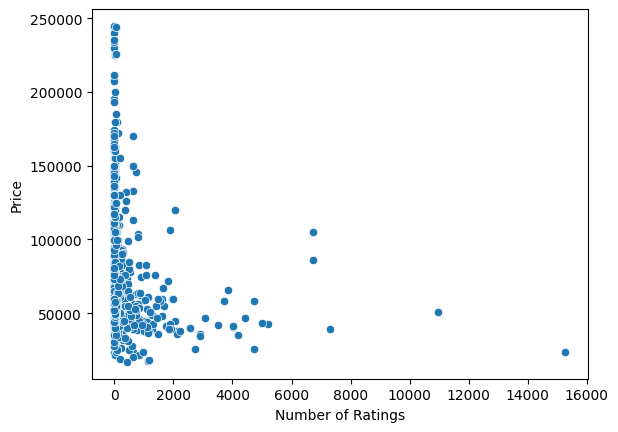

correlation
 [[ 1.        -0.1602164]
 [-0.1602164  1.       ]]


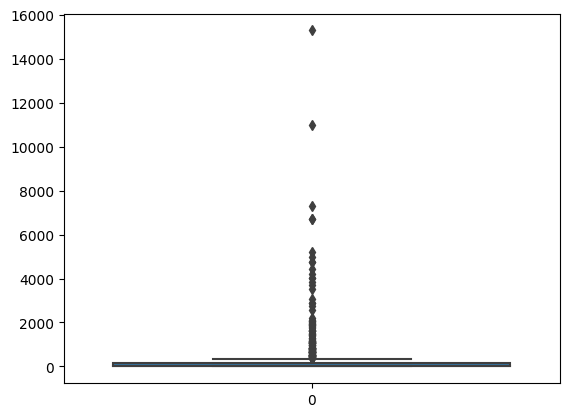

In [43]:
num("Number of Ratings")

In [115]:
data.drop("Number of Ratings",axis=1,inplace=True)

Data Type
 int64
Unique Datas
 [   0    5    1    3  240   47   67  196   19    6 1947   27    7  235
  181   30  171   39    4   36  147   65  137   41   64    2  165   21
  160   13  107   11  561   96    9   92    8  108   18   59   12   29
  126   56  297   17   34  305   99   66  215  519  234  135   15  233
   40  189  490   46   10   45  175  216   26   93  116   35  113  170
   91   16  103   25  148   23   54 1185  241  109  569   24  412   95
   20  228  378   31  227  152   87  123   14  112   71  100   37   85
   48  118   28  179  106  325  127   51  128   53  230   49   83  313
  629   70   89  658  350  375   33   42  895   58  432   84  532   80
  188  134   52  203   69  151   74  145   22]
Describing the data
 count     795.000000
mean       36.400000
std       118.787444
min         0.000000
25%         0.000000
50%         2.000000
75%        18.500000
max      1947.000000
Name: Number of Reviews, dtype: float64


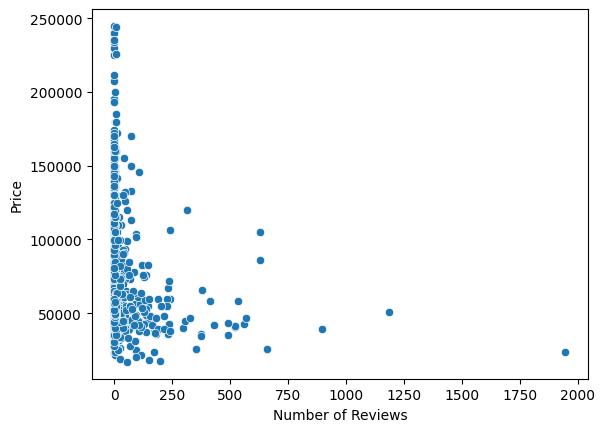

correlation
 [[ 1.         -0.16505625]
 [-0.16505625  1.        ]]


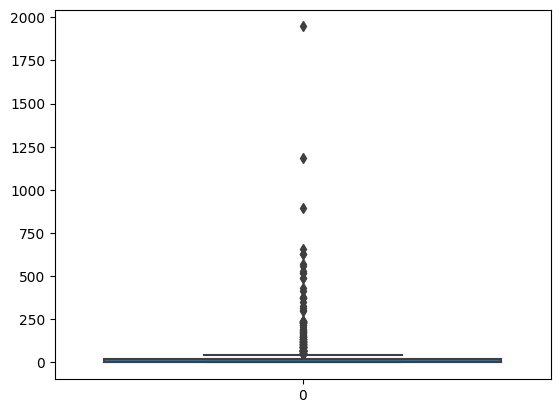

In [44]:
num("Number of Reviews")

In [116]:
data.drop("Number of Reviews",axis=1,inplace=True)

In [117]:
data.reset_index(drop=True,inplace=True)

In [124]:
X=data.drop("Price",axis=1)
X.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,1,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,2
1,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,3
2,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,3
3,1,1,2,10,8,1,512,0,2,32,2,0,0,0,0,3
4,1,1,0,0,4,1,0,512,2,64,0,0,0,0,0,3


In [125]:
y=data.price
y.head()

0    10.453024
1    10.571291
2    10.596610
3    11.156108
4    10.203222
Name: Price, dtype: float64

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [127]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((636, 16), (159, 16), (636,), (159,))

In [128]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pre=lr.predict(X_train)
y_test_pre=lr.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.2263419127177742
Test RMSE = 0.24552040324377924
Train R2_square = 0.769806128789059
Test R2_square = 0.7410287318531991


In [130]:
DR=DecisionTreeRegressor()
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.03813977429338332
Test RMSE = 0.2534370176320966
Train R2_square = 0.9934638797956229
Test R2_square = 0.724058827928857


In [131]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.07221949042677807
Test RMSE = 0.2161797690925545
Train R2_square = 0.9765645858419222
Test R2_square = 0.7992264475897228


In [134]:
ls=Lasso()
ls.fit(X_train,y_train)
y_train_pre=ls.predict(X_train)
y_test_pre=ls.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.3576667103635804
Test RMSE = 0.35924889965194706
Train R2_square = 0.42519460722599034
Test R2_square = 0.44554372967937395


In [135]:
Rg=Ridge()
Rg.fit(X_train,y_train)
y_train_pre=Rg.predict(X_train)
y_test_pre=Rg.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.22635725834904702
Test RMSE = 0.24553945784568526
Train R2_square = 0.7697749141547524
Test R2_square = 0.7409885332722339


In [136]:
selection = ExtraTreesRegressor()
selection.fit(X,y)
print(selection.feature_importances_)

[0.03294896 0.01656329 0.18873182 0.04061539 0.15277435 0.03683771
 0.25782697 0.01175258 0.04184336 0.00749237 0.10060695 0.02322728
 0.01768529 0.0362967  0.01400348 0.02079349]


<Axes: >

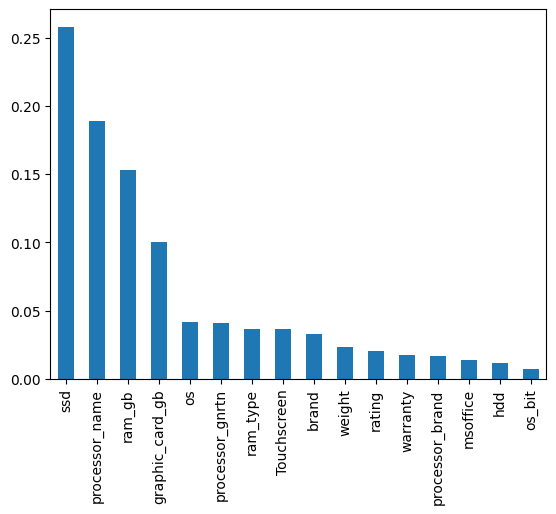

In [137]:
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [138]:
X_imp = X[feat_importances.nlargest(9).index]
X_imp.head()

,ssd,processor_name,ram_gb,graphic_card_gb,os,processor_gnrtn,ram_type,Touchscreen,brand
0,0,1,4,0,2,10,1,0,1
1,0,1,4,0,2,10,1,0,5
2,0,1,4,0,2,10,1,0,5
3,512,2,8,2,2,10,1,0,1
4,0,0,4,0,2,0,1,0,1


In [139]:
X_train,X_test,y_train,y_test=train_test_split(X_imp,y,test_size=.20,random_state=14)

In [146]:
n_estimators=[i for i in range(50,500,50)]
max_depth=[i for i in range(5,30,5)]
max_leaf_nodes=[i for i in range(2,20,2)]

In [147]:
random_grid_RF={"n_estimators":n_estimators,"max_depth":max_depth,"max_leaf_nodes":max_leaf_nodes}

In [148]:
from sklearn.model_selection import RandomizedSearchCV
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid_RF,cv=4,random_state = 0)

In [149]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   min_samples_leaf=6,
                                                   n_estimators=200),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_leaf_nodes': [2, 4, 6, 8, 10, 12,
                                                           14, 16, 18],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450]},
                   random_state=0)

In [150]:
RF_model.best_params_

{'n_estimators': 250, 'max_leaf_nodes': 18, 'max_depth': 15}

In [151]:
RF=RandomForestRegressor(n_estimators=250, max_leaf_nodes=18,max_depth=15)
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.17737972382131334
Test RMSE = 0.22806135912528083
Train R2_square = 0.8586252851004652
Test R2_square = 0.7765502761004861
